### In the Notebook let's try extracting/collecting data for *protein*: `Amyloid-beta precursor protein` *UniprotID:* `P05067`

##### Let's assume that we have Uniport ID, then is there any way to programmatically get Protein name?

Yes, It is possible. we can use BioPython to perform this task

In [1]:
from Bio import ExPASy
from Bio import SwissProt

def retrieve_protein_name(uniprot_id):
    with ExPASy.get_sprot_raw(uniprot_id) as handle:
        record = SwissProt.read(handle)
        protein_name = record.entry_name
        return protein_name


uniprot_id = "P05067"  # Replace with your UniProt ID
protein_name = retrieve_protein_name(uniprot_id)
print(f"Protein Name: {protein_name}")


Protein Name: A4_HUMAN


Now we have Let's try collecting the available drug data from Chembl

Here, we are using `chembl_webresource_client` package to programmatically fetch the smiles and it's info using protein name

In [1]:
from chembl_webresource_client.new_client import new_client
target = new_client.target # this function helps in fetching target related data
activity = new_client.activity  # this function helps in fetching target's activity related data

In [2]:
res = target.filter(target_components__accession="P05067")

In [3]:
res

[{'cross_references': [{'xref_id': 'P05067', 'xref_name': None, 'xref_src': 'canSAR-Target'}, {'xref_id': 'Amyloid_precursor_protein', 'xref_name': None, 'xref_src': 'Wikipedia'}, {'xref_id': 'NBK23203', 'xref_name': 'Aggregates of Amyloid-beta peptide', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23443', 'xref_name': 'Aggregates of Beta-amyloid peptide', 'xref_src': 'MICAD'}, {'xref_id': 'NBK23213', 'xref_name': 'Aggregates of Beta-amyloid peptides', 'xref_src': 'MICAD'}, {'xref_id': 'NBK32300', 'xref_name': 'Amyloid-beta peptide', 'xref_src': 'MICAD'}, {'xref_id': 'NBK57129', 'xref_name': 'Amyloid-beta peptide', 'xref_src': 'MICAD'}, {'xref_id': 'NBK82968', 'xref_name': 'Beta-amyloid', 'xref_src': 'MICAD'}, {'xref_id': 'NBK82969', 'xref_name': 'Beta-amyloid (A-beta)', 'xref_src': 'MICAD'}, {'xref_id': 'NBK84117', 'xref_name': 'Beta-amyloid plaques', 'xref_src': 'MICAD'}], 'organism': 'Homo sapiens', 'pref_name': 'Beta amyloid A4 protein', 'species_group_flag': False, 'target_chembl_id': 'C

Let's converted the collected info into DataFrame

In [4]:
import pandas as pd
pd.DataFrame(res)

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


From DataFrame, we get know that for our A4_HUMAN has only one entry in the Chembl with ID=-`'CHEMBL2487` 

To confirm this entry : you can access this link: https://www.ebi.ac.uk/chembl/g/#search_results/targets/query=CHEMBL2487 

In [5]:
target_dict= {"target_chembl_id":[],"target_components":[]} # Creating Dict to save target_id and componets info

In [6]:
res[0].keys()

dict_keys(['cross_references', 'organism', 'pref_name', 'species_group_flag', 'target_chembl_id', 'target_components', 'target_type', 'tax_id'])

In [7]:
target_components=res[0]['target_components']
target_components

[{'accession': 'P05067',
  'component_description': 'Amyloid-beta precursor protein',
  'component_id': 828,
  'component_type': 'PROTEIN',
  'relationship': 'SINGLE PROTEIN',
  'target_component_synonyms': [{'component_synonym': 'A4',
    'syn_type': 'GENE_SYMBOL_OTHER'},
   {'component_synonym': 'AD1', 'syn_type': 'GENE_SYMBOL_OTHER'},
   {'component_synonym': 'Synonyms=A4', 'syn_type': 'GENE_SYMBOL_OTHER'},
   {'component_synonym': 'AD1 GN  ', 'syn_type': 'GENE_SYMBOL_OTHER'},
   {'component_synonym': 'APP', 'syn_type': 'GENE_SYMBOL'},
   {'component_synonym': 'Amyloid-beta precursor protein',
    'syn_type': 'UNIPROT'},
   {'component_synonym': 'N-APP', 'syn_type': 'UNIPROT'},
   {'component_synonym': 'Soluble APP-alpha', 'syn_type': 'UNIPROT'},
   {'component_synonym': 'Soluble APP-beta', 'syn_type': 'UNIPROT'},
   {'component_synonym': 'C99', 'syn_type': 'UNIPROT'},
   {'component_synonym': 'Amyloid-beta protein 42', 'syn_type': 'UNIPROT'},
   {'component_synonym': 'Amyloid-beta 

In [8]:
target_components[0].keys()

dict_keys(['accession', 'component_description', 'component_id', 'component_type', 'relationship', 'target_component_synonyms', 'target_component_xrefs'])

In [9]:
target_components=res[0]['target_components']
for target_com in target_components:
    target_chembl_id = res[0]['target_chembl_id']
    # act = activity.filter(target_chembl_id=target_chembl_id)
    target_dict['target_chembl_id'].append(res[0]['target_chembl_id'])
    target_dict['target_components'].append(target_components)

In [23]:
target_dict

{'target_chembl_id': ['CHEMBL2487'],
 'target_components': [[{'accession': 'P05067',
    'component_description': 'Amyloid-beta precursor protein',
    'component_id': 828,
    'component_type': 'PROTEIN',
    'relationship': 'SINGLE PROTEIN',
    'target_component_synonyms': [{'component_synonym': 'A4',
      'syn_type': 'GENE_SYMBOL_OTHER'},
     {'component_synonym': 'AD1', 'syn_type': 'GENE_SYMBOL_OTHER'},
     {'component_synonym': 'Synonyms=A4', 'syn_type': 'GENE_SYMBOL_OTHER'},
     {'component_synonym': 'AD1 GN  ', 'syn_type': 'GENE_SYMBOL_OTHER'},
     {'component_synonym': 'APP', 'syn_type': 'GENE_SYMBOL'},
     {'component_synonym': 'Amyloid-beta precursor protein',
      'syn_type': 'UNIPROT'},
     {'component_synonym': 'N-APP', 'syn_type': 'UNIPROT'},
     {'component_synonym': 'Soluble APP-alpha', 'syn_type': 'UNIPROT'},
     {'component_synonym': 'Soluble APP-beta', 'syn_type': 'UNIPROT'},
     {'component_synonym': 'C99', 'syn_type': 'UNIPROT'},
     {'component_synony

Until Now, we are only able get the target related info.

Now, Lets try to extract the smiles and activity info 

In [10]:
act = activity.filter(target_chembl_id=target_dict['target_chembl_id'])

In [11]:
act_df=pd.DataFrame(act)

In [12]:
act_df.shape

(7918, 45)

In [13]:
act_df.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

As there are lot of info, let's try to filter down the data to necessary keys i.e `assay_descripti`,`standard_type`,`canonical_smiles`,`standard_value`,`standard_units` and `standard_relation`

In [15]:

chembl_dict={
    "assay":[],"std_type":[],"SMILES":[],"std_value":[],"std_units":[],"standard_relation":[],"molecule_chembl_id":[]}

In [16]:
for a in act:
                    
    chembl_dict["assay"].append(a['assay_description'])
    chembl_dict["std_type"].append(a['standard_type'])
    chembl_dict["SMILES"].append(a['canonical_smiles'])
    chembl_dict["std_value"].append(a['standard_value'])
    chembl_dict["std_units"].append(a['standard_units'])
    chembl_dict['standard_relation'].append(a['standard_relation'])
    chembl_dict['molecule_chembl_id'].append(a['molecule_chembl_id'])
    chembl_data=pd.DataFrame(chembl_dict)

In [17]:
chembl_data

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
0,Inhibition constant against [125I]-7 (TZDM) bi...,Ki,CN(C)c1ccc(-c2cn3cc(Br)ccc3n2)cc1,10.3,nM,=,CHEMBL81260
1,Inhibition constant against [125I]-7 (TZDM) bi...,Ki,CN(C)c1ccc(-c2nc3ccc(I)cc3s2)cc1,0.9,nM,=,CHEMBL55380
2,Inhibition constant against [125I]-7 (TZDM) bi...,Ki,CNc1ccc(-c2cn3cc(C)ccc3n2)cc1,2000.0,nM,>,CHEMBL78410
3,Inhibition constant against [125I]-7 (TZDM) bi...,Ki,CNc1ccc(-c2cn3ccccc3n2)cc1,1000.0,nM,>,CHEMBL81685
4,Inhibition constant against [125I]-7 (TZDM) bi...,Ki,Cc1ccc2nc(-c3ccc(N(C)C)cc3)cn2c1,242.0,nM,=,CHEMBL78621
...,...,...,...,...,...,...,...
7913,Binding affinity to CM-5 sensor chip immobiliz...,Activity,CC(=O)N1C(=O)/C(=C/c2ccc(OCCCN3CCCCC3)cc2)NC(=...,None,None,None,CHEMBL5086337
7914,Binding affinity to CM-5 sensor chip immobiliz...,Activity,O=C1N[C@@H](Cc2ccccc2)C(=O)N/C1=C\c1ccc(OCCCN2...,None,None,None,CHEMBL5092241
7915,Binding affinity to CM-5 sensor chip immobiliz...,Kd,O=C1N[C@@H](Cc2ccc(OCCCN3CCCCC3)cc2)C(=O)N[C@H...,12000000.0,nM,=,CHEMBL5092830
7916,Binding affinity to CM-5 sensor chip immobiliz...,Kd,O=C1CN(Cc2ccc(OCCCN3CCCCC3)cc2)C(=O)CN1,1547000.0,nM,=,CHEMBL5077020


In [18]:
chembl_data.to_csv("Chembl_data.csv",index=False)

We have collected the Data. 

#### Next step will be to analyse, clean and process the data

In [19]:
import pandas as pd
chembl_data=pd.read_csv("Chembl_data.csv")

Finding the Unique values to understand the data distribution better

In [20]:
chembl_data['std_units'].unique()

array(['nM', '%', nan, '/uM', 'uM', 'um', 'nm', 'hr', "10'5/M",
       "10'6/min", '/M/min', 'min', 'a.u.', '/hr', 'µM'], dtype=object)

Interpretation: 

- Totally there are 14 different type of measurements along with NA

In [21]:
chembl_data['standard_relation'].unique()

array(['=', '>', '<', nan, '<=', '>='], dtype=object)

Interpreation:

- 5 type of Standard realtion with NA

In [22]:
chembl_data['std_type'].unique()

array(['Ki', 'Inhibition', 'IC50', 'Stimulation', 'EC50', 'Activity',
       'Kd', 'Potency', 'FC', 'Bmax', 'Ratio', 'Imax', 'Ratio Ki', 'RFU',
       'Ratio IC50', 'TIME', 'Ka', 'K', 'Ke(app)', 'T1/2', 'Tlag',
       'Flu intensity', 'Survival', 'Retention_time', 'DC50', 'pIC50',
       'INH'], dtype=object)

Interpreation:

- 27 type of Standard type i.e activity type  with NA

In [23]:
chembl_data['assay'].unique()

array(['Inhibition constant against [125I]-7 (TZDM) binding to Amyloid beta 1-40 aggregates',
       'Inhibition of A-beta-42 production by inhibiting Gamma-secretase proteolytic pathway in HEK293 cell stably transfected with a double mutant form of human APP(K595N/M596L), at 2.5 uM concentration',
       'Inhibition of A-beta-42 production by inhibiting Gamma-secretase proteolytic pathway in HEK293 cell stably transfected with a double mutant form of human APP(K595N/M596L)',
       ...,
       'Inhibition of wild type human APP expressed in CHO cells assessed as reduction in amyloid beta 42 secretion incubated for 24 hrs by immunoassay',
       'Binding affinity to CM-5 sensor chip immobilized beta-amyloid monomer (1 to 42) (unknown origin) at 200 uM by SPR analysis',
       'Binding affinity to CM-5 sensor chip immobilized beta-amyloid monomer (1 to 42) (unknown origin) assessed as dissociation constant by SPR analysis'],
      dtype=object)

Finding Missing values in the `Std_type` and droping them.

In [24]:
chembl_data[chembl_data['std_type']=="IC50"].count()

assay                 1497
std_type              1497
SMILES                1497
std_value             1323
std_units             1355
standard_relation     1319
molecule_chembl_id    1497
dtype: int64

In [25]:
chembl_data[chembl_data['std_type']=="IC50"].dropna(axis=0).count()

assay                 1319
std_type              1319
SMILES                1319
std_value             1319
std_units             1319
standard_relation     1319
molecule_chembl_id    1319
dtype: int64

In [26]:
Chembl_IC50 = chembl_data[chembl_data['std_type']=="IC50"].dropna(axis=0).reset_index(drop=True)
Chembl_IC50

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,CHEMBL311039
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,CHEMBL450926
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,CHEMBL310242
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,CHEMBL74874
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,CHEMBL75183
...,...,...,...,...,...,...,...
1314,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ncc(Cl)cc3Cl)ccc2F)CO[C@@...,22.0,nM,=,CHEMBL5085959
1315,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,nM,=,CHEMBL3653401
1316,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,nM,=,CHEMBL3653401
1317,Inhibition of wild type human APP expressed in...,IC50,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,nM,=,CHEMBL3261067


In [27]:
Chembl_IC50['std_units'].unique()

array(['nM', '%', 'µM'], dtype=object)

Interpreation:

- After dropping missing values across row for std type, we see only 3 types of `std_units`

Saving each units data spearately and understanding it's distribution

##### Analysing the data distribution for units `nM`

In [28]:
Chembl_IC50_nm=Chembl_IC50[Chembl_IC50['std_units']=='nM']
Chembl_IC50_nm.shape

(1315, 7)

In [29]:
Chembl_IC50_nm['standard_relation'].unique()

array(['=', '>', '<'], dtype=object)

In [30]:
Chembl_IC50_nm.groupby(by='standard_relation').count()

,assay,std_type,SMILES,std_value,std_units,molecule_chembl_id
standard_relation,,,,,,
<,9,9,9,9,9,9
=,1161,1161,1161,1161,1161,1161
>,145,145,145,145,145,145


There 3 different relation, hence let's understand each group's individually 

<AxesSubplot:ylabel='Density'>

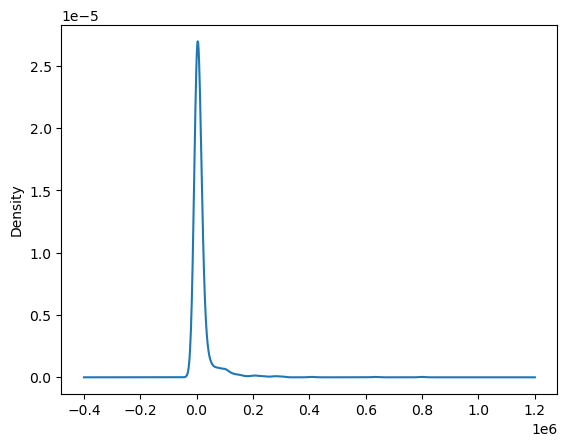

In [31]:
import matplotlib.pyplot as plt
Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']['std_value'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

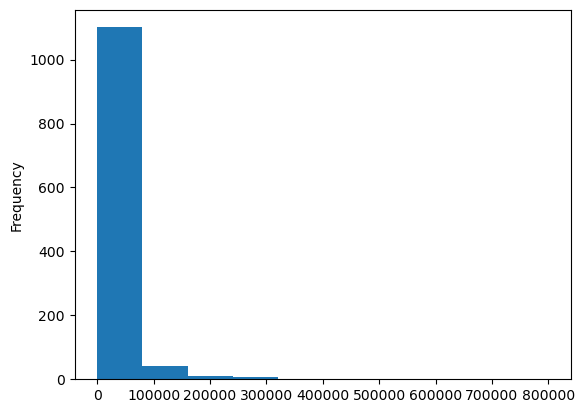

In [33]:
Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']['std_value'].plot(kind='hist')

#### Interpreation:

- there are decent number of inactive molcules and most of the data falls below 1000000nM
- Let's try understand the distribution in diff ranges of data

<AxesSubplot:>

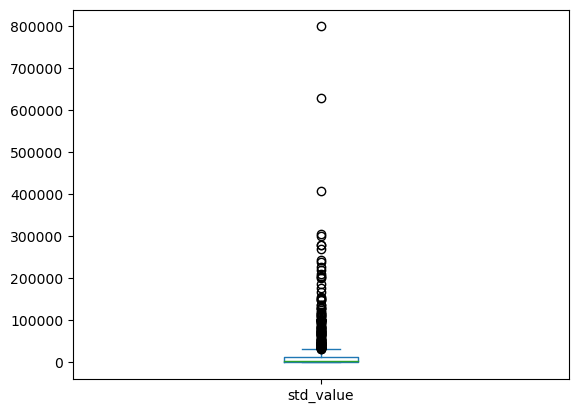

In [34]:
Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']['std_value'].plot(kind='box')

In [35]:
print(Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']['std_value'].max())
print(Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']['std_value'].min())


800000.0
0.3


Max activity is 8 mM which is highly inactive compund against A4_human

Whereas 0.3 nM is good activity compound

In [36]:
Chembl_IC50_nm_equal= Chembl_IC50_nm[Chembl_IC50_nm['standard_relation']=='=']

In [37]:
Chembl_IC50_nm_equal.groupby('assay').count()

,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
assay,,,,,,
Binding affinity to human amyloid beta plaque,14,14,14,14,14,14
"Binidng Assay: First, amyloid beta peptides (1-40, Peptide Institute, Minoh-shi, Osaka) were dissolved in a 50 mM phosphate buffer containing 100 mM sodium chloride (pH 7.5) such that the concentration of the amyloid beta peptides was 100 mM, and then the solution was left to stand for 16 hours at 30 C., thereby producing amyloid beta peptide aggregates. To these amyloid beta peptide, amyloid beta peptide aggregates that had been prepared in advance by the same method and sonicated for 30 minutes under 28-45-100 KHz variation were added by a 1/1000 quantity, whereby uniform amyloid beta peptide aggregates were prepared.The amyloid beta peptide aggregates prepared by the above method, thioflavin-T, and a measurement compound were added in a 50 mM phosphate buffer (pH 7.4) such that the final concentrations thereof were 1 uM, 3 uM, and 0.02 to 20 uM, respectively. The resultant solution was cause to react for 30 minutes at 23 C. with the light shielded.",21,21,21,21,21,21
Concentration required to inhibit A beta 40 peptide,4,4,4,4,4,4
Concentration required to inhibit A beta 40 peptide 100 uM,5,5,5,5,5,5
Concentration required to inhibit A beta 40 peptide 100 um,1,1,1,1,1,1
...,...,...,...,...,...,...
Modulation of human wild-type APP695 expressed in SH-SY5Y cells assessed as inhibition of amyloid beta (1 to 40 residues) production measured after 24 hrs,16,16,16,16,16,16
Modulation of human wild-type APP695 expressed in SH-SY5Y cells assessed as inhibition of amyloid beta (1 to 42 residues) production measured after 24 hrs by ELISA,15,15,15,15,15,15
"Pharmacological Assay: Gamma-secretase activity was determined as described by Zhang et al. (Biochemistry, 40(16), 5049-5055, 2001).",10,10,10,10,10,10


In [38]:
len(Chembl_IC50_nm_equal['assay'].unique())

140

Interpretation:

- Total there are 140 different assay for 1161 compounds

The active and inactive range for smiles against the compound in nM is not a fixed value. It can vary depending on the compound and the assay used to measure activity. In general, the active range is considered to be the concentration of the compound that produces a measurable biological response, while the inactive range is the concentration of the compound that does not produce a measurable biological response.

In [43]:
Chembl_IC50_nm[(Chembl_IC50_nm['standard_relation']=='=') & (Chembl_IC50_nm['std_value']>=10000)].shape

(353, 7)

<AxesSubplot:ylabel='Frequency'>

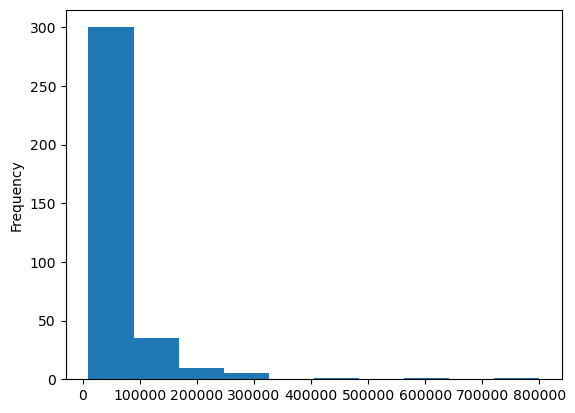

In [44]:
Chembl_IC50_nm[(Chembl_IC50_nm['standard_relation']=='=') & (Chembl_IC50_nm['std_value']>=10000)]['std_value'].plot(kind='hist')

In [45]:
Chembl_IC50_nm[(Chembl_IC50_nm['standard_relation']=='=') & (Chembl_IC50_nm['std_value']<=10000)].shape

(811, 7)

<AxesSubplot:ylabel='Frequency'>

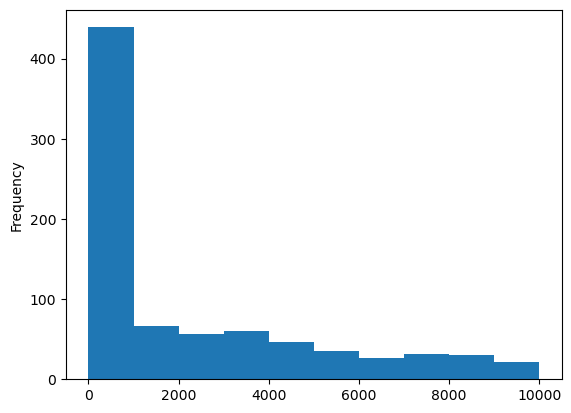

In [46]:
Chembl_IC50_nm[(Chembl_IC50_nm['standard_relation']=='=') & (Chembl_IC50_nm['std_value']<=10000)]['std_value'].plot(kind='hist')

For this study let's consider the compounds which are less than 1000nM are active and greater than that to be inactive. 

In [39]:
Chembl_IC50_nm.dtypes

assay                  object
std_type               object
SMILES                 object
std_value             float64
std_units              object
standard_relation      object
molecule_chembl_id     object
dtype: object

In [40]:
activity_type = ['active' if value <=10000 else 'inactive' for value in Chembl_IC50_nm_equal['std_value']  ]

In [41]:
Chembl_IC50_nm_equal['activity_type']=activity_type

C:\Users\kiran.franklin\AppData\Local\Temp\ipykernel_45020\32124063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chembl_IC50_nm_equal['activity_type']=activity_type


In [47]:
Chembl_IC50_nm_equal.groupby('activity_type').count()

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
activity_type,,,,,,,
active,811,811,811,811,811,811,811
inactive,350,350,350,350,350,350,350


Note: this grouping is just to understand the data range not to perform and analysis

Let's understand data whose units were "µM" and "%"

In [48]:
Chembl_IC50_um=Chembl_IC50[Chembl_IC50['std_units']=='µM']
Chembl_IC50_um.shape

(2, 7)

In [49]:
Chembl_IC50_um

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
1268,Aβ42 inhibition assay,IC50,COc1cc(-c2cn(C3CCc4ccccc4N(CC(F)(F)F)C3=O)nn2)...,10.0,µM,>,CHEMBL4534005
1269,Aβ40 inhibition assay,IC50,COc1cc(-c2cn(C3CCc4ccccc4N(CC(F)(F)F)C3=O)nn2)...,10.0,µM,>,CHEMBL4534005


In [50]:
Chembl_IC50_percentage=Chembl_IC50[Chembl_IC50['std_units']=='%']
Chembl_IC50_percentage.shape

(2, 7)

In [51]:
Chembl_IC50_percentage

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id
17,Concentration required to inhibit A beta 40 pe...,IC50,O=C(O)C1(c2ccc(-c3ccccc3)c(F)c2)CC1,-1.0,%,=,CHEMBL194760
23,Concentration required to inhibit A beta 40 pe...,IC50,O=C(O)C1(c2ccc(-c3csc4ccccc34)c(F)c2)CC1,-5.0,%,=,CHEMBL196946


We can see both this data sets and be skipped as we cannot convert % data to nM and µM is having uncertain relation. 

In [52]:
##### Filtering the uncertain data ######
Chembl_IC50_nm_equal.to_csv("Chembl_IC50_nm_equal.csv",index=False)

Let's process the smiles

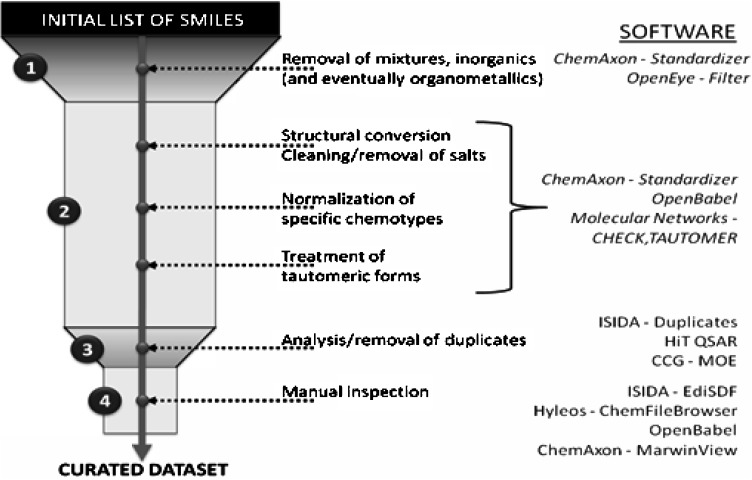

In [53]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import MolFromSmiles,MolToSmiles


In [54]:
import structure_curation as cur

[08:37:41] Initializing Normalizer


In [55]:
Chembl_IC50_nm_equal=pd.read_csv("Chembl_IC50_nm_equal.csv")
Chembl_IC50_nm_equal.head()

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id,activity_type
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,CHEMBL311039,active
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,CHEMBL450926,active
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,CHEMBL310242,active
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,CHEMBL74874,inactive
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,CHEMBL75183,active


In [56]:
data_cur = cur.Curator()
data_cur.get_rdkit_mol("CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1")
substance_type, sanitized_smiles = data_cur.filter_smiles()  

[08:37:48] Running Normalizer
[08:37:48] Running Uncharger


In [57]:
substance_type,sanitized_smiles

('organic', 'CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1')

In [58]:
data_cur.get_rdkit_mol("CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp")
data_cur.filter_smiles()

[08:37:52] SMILES Parse Error: syntax error while parsing: CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp
[08:37:52] SMILES Parse Error: Failed parsing SMILES 'CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp' for input: 'CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp'
[08:37:52] SMILES Parse Error: syntax error while parsing: CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp
[08:37:52] SMILES Parse Error: Failed parsing SMILES 'CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp' for input: 'CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1mp'


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(class RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(class RDKit::ROMol mol, struct RDKit::SmilesWriteParams params)

In [59]:
import numpy as np
from tqdm import tqdm
for i, row in tqdm(Chembl_IC50_nm_equal.iterrows()):
    try:
        smi = row['SMILES']
        data_cur.get_rdkit_mol(smi)
        substance_type, sanitized_smiles = data_cur.filter_smiles()   
        Chembl_IC50_nm_equal.loc[Chembl_IC50_nm_equal.index == i,'structure_curated'] = sanitized_smiles
        Chembl_IC50_nm_equal.loc[Chembl_IC50_nm_equal.index == i,'substance_type_name'] = substance_type
    except:
        Chembl_IC50_nm_equal.loc[Chembl_IC50_nm_equal.index == i,'structure_curated'] = np.nan
        Chembl_IC50_nm_equal.loc[Chembl_IC50_nm_equal.index == i,'substance_type_name'] = np.nan

0it [00:00, ?it/s][08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
5it [00:00, 45.11it/s][08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
10it [00:00, 45.58it/s][08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
[08:37:58] Running Normalizer
[08:37:58] Running Uncharger
15it [00:00, 42.14it/s][08:37:58] Running Normalizer

In [60]:
Chembl_IC50_nm_equal

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id,activity_type,structure_curated,substance_type_name
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,CHEMBL311039,active,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,organic
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,CHEMBL450926,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,organic
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,CHEMBL310242,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,CHEMBL74874,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,CHEMBL75183,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic
...,...,...,...,...,...,...,...,...,...,...
1156,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ncc(Cl)cc3Cl)ccc2F)CO[C@@...,22.0,nM,=,CHEMBL5085959,active,C[C@@]1(c2cc(NC(=O)c3ncc(Cl)cc3Cl)ccc2F)CO[C@@...,organic
1157,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,nM,=,CHEMBL3653401,active,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,organic
1158,Inhibition of wild type human APP751 expressed...,IC50,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,22.0,nM,=,CHEMBL3653401,active,C[C@@]1(c2cc(NC(=O)c3ccc(Br)cn3)ccc2F)CO[C@@](...,organic
1159,Inhibition of wild type human APP expressed in...,IC50,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,3.0,nM,=,CHEMBL3261067,active,Cc1cc(C#N)cnc1C(=O)Nc1ccc(F)c([C@]2(C)CO[C@@](...,organic


In [61]:
Chembl_IC50_nm_equal["substance_type_name"].unique()

array(['organic', 'organic_salt', 'peptide', 'organometallic'],
      dtype=object)

In [62]:
Chembl_IC50_nm_equal.groupby("substance_type_name").count()

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id,activity_type,structure_curated
substance_type_name,,,,,,,,,
organic,1130,1130,1130,1130,1130,1130,1130,1130,1130
organic_salt,16,16,16,16,16,16,16,16,16
organometallic,7,7,7,7,7,7,7,7,7
peptide,8,8,8,8,8,8,8,8,8


In [63]:
Chembl_IC50_nm_equal.isna().value_counts()

assay  std_type  SMILES  std_value  std_units  standard_relation  molecule_chembl_id  activity_type  structure_curated  substance_type_name
False  False     False   False      False      False              False               False          False              False                  1161
dtype: int64

In [64]:
Chembl_IC50_nm_equal_organic=Chembl_IC50_nm_equal[Chembl_IC50_nm_equal['substance_type_name']=="organic"].reset_index(drop=True)

In [65]:
Chembl_IC50_nm_equal_organic.groupby('activity_type').count()

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id,structure_curated,substance_type_name
activity_type,,,,,,,,,
active,789,789,789,789,789,789,789,789,789
inactive,341,341,341,341,341,341,341,341,341


In [66]:
Chembl_IC50_nm_equal_organic.shape

(1130, 10)

In [67]:
Chembl_IC50_nm_equal_organic['pIC50']=-np.log10(Chembl_IC50_nm_equal_organic['std_value']*pow(10,-9))

In [68]:
Chembl_IC50_nm_equal_organic.head()

,assay,std_type,SMILES,std_value,std_units,standard_relation,molecule_chembl_id,activity_type,structure_curated,substance_type_name,pIC50
0,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,nM,=,CHEMBL311039,active,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,organic,5.301030
1,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,nM,=,CHEMBL450926,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,organic,5.568636
2,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,nM,=,CHEMBL310242,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.744727
3,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,nM,=,CHEMBL74874,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,4.958607
4,Inhibition of A-beta-42 production by inhibiti...,IC50,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,nM,=,CHEMBL75183,active,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,organic,5.000000


<AxesSubplot:ylabel='Density'>

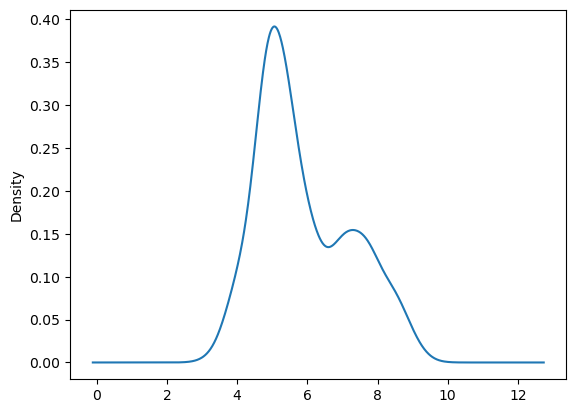

In [69]:
Chembl_IC50_nm_equal_organic['pIC50'].plot(kind='kde')

In [70]:
Chembl_IC50_nm_equal_organic.to_csv("Chembl_pIC50_curated.csv",index=False)